///---
layout: post
title: "Conway's Game of Life (생명 게임)"
comments: true
share: true
date: 2018-09-09 13:51:00
description: 콘웨이의 생명 게임을 Python으로 코딩한다.
tags: python math
sitemap :
    changefreq : daily
    priority : 1.0
///---

# Conway's Game of Life (생명 게임)
---

## 규칙

콘웨이의 생명 게임에 관한 자세한 설명은 위키 피디아에 자세하게 나와있으니 여기서는 간단한 규칙[1]만 소개한다.
  * 삷과 죽음의 규칙
    * 죽은 칸과 인접한 8칸 중 정확히 3칸에 세포가 살아 있다면 해당 칸의 세포는 그 다음 세대에 살아난다.
    * 살아있는 칸과 인접한 8칸 중 2칸 혹은 3칸에 세포가 살아 있다면 해당 칸의 세포는 살아있는 상태를 유지한다.
    * 그 이외의 경우 해당 칸의 세포는 다음 세대에 고립돼 죽거나 혹은 주위가 너무 복잡해져서 죽는다. 혹은 죽은 상태를 유지한다.  
    
  * 외곽 처리 규칙
    * Conway 게임은 상하, 좌우의 외곽이 서로 연결되어 있다.
  
  
  

## Conway 코드
scipy.ndimage의 generic_filter를 이용하면 매우 쉽게 Conway 게임을 코딩 할 수 있다[2].  
삷과 죽음의 규칙은 conway_filter에서 처리하고 외곽 규칙은 generic_filter mode를 'wrap'으로 설정하여 만족 시킬 수 있다.

In [6]:
# Show in Markdown
from numpy import array, pad, sum
from scipy.ndimage import generic_filter

def conway_filter(values):
    center = values[len(values) // 2]
    neighbors_count = sum(values) - center
    if neighbors_count == 3 or (center and neighbors_count == 2):
        return 1
    else:
        return 0
    
# 0: death, 1: live
data_init = array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# data_init 외곽에 0을 5개씩 추가한다.
data_prev = pad(data_init, [5, 5], mode='constant', constant_values=0)

# Conway 다음 상황을 계산한다.
data_post = generic_filter(data_prev, conway_filter, size=3, mode='wrap')

## Conway Animation Code

In [7]:
from matplotlib import pyplot as plt

plt.rcParams['savefig.facecolor'] = [0.26666667, 0.26666667, 0.26666667, 1]

In [8]:
# Show in Markdown
from numpy import ndarray, arange, array, pad, zeros
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from matplotlib.axes import Axes
from IPython.display import HTML
from numpy.random_intel import randn

def imshow_init(b_grid):
    
    global data_prev, ax, im
    # Grid를 그린다
    if b_grid:
        major_ticks_x = arange(0, data_prev.shape[1] + 1, 1) - 0.5
        ax.set_xticks(major_ticks_x)

        major_ticks_y = arange(0, data_prev.shape[0] + 1, 1) - 0.5
        ax.set_yticks(major_ticks_y)
        ax.grid(which='both')
    
    # 축의 글씨를 지운다
    ax.tick_params(axis='both', which='both', bottom=False, top=False,
                   labelbottom=False, right=False, left=False, labelleft=False)
    fig.tight_layout()
    im.set_array([[]])
    
    return (im,)

def imshow_conway_seq(i: int):
    global data_prev, ax, im
    data_prev = generic_filter(data_prev, conway_filter, size=3, mode='wrap')
    im.set_array(data_prev)

    return (im,)

## Conway Example (+)

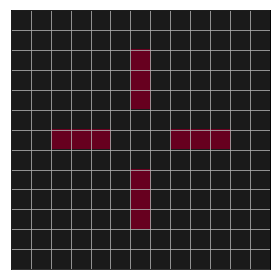

In [9]:
# Show in Markdown
data_init = array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])
data_prev = pad(data_init, [5, 5], mode='constant', constant_values=0)

fig, ax = plt.subplots()
ax.grid(True)
im = ax.imshow(data_prev, cmap='RdGy_r')

anim = animation.FuncAnimation(fig, lambda x: imshow_conway_seq(x),
                               init_func=lambda: imshow_init(True),
                               frames=9, interval=1000, blit=True)
HTML(anim.to_html5_video())

## Conway Example (glider gun)
glider gun array는 [3] 참조

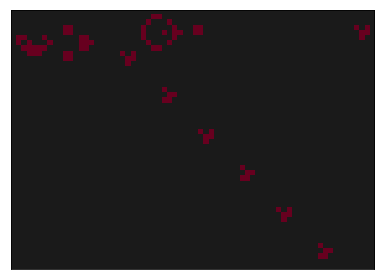

In [10]:
# Show in Markdown
data_init = array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                   [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

data_prev = zeros((50, 70))
data_prev[1:10,1:37] = data_init

fig, ax = plt.subplots()
im = ax.imshow(data_prev, cmap='RdGy_r')

anim = animation.FuncAnimation(fig, lambda x: imshow_conway_seq(x),
                               init_func=lambda: imshow_init(False),
                               frames=200, interval=100, blit=True)
HTML(anim.to_html5_video())

## 참고문헌
[1] https://namu.wiki/w/콘웨이의%20생명%20게임  
[2] 스테판 판데르발트. (2018). 이미지 지역망: ndimage, 우아한 사이파이 (쪽). 한빛미디어  
[3] https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/